In [20]:
import matplotlib.pyplot as plt

In [25]:
import numpy as np
from scipy import interpolate


def dvr(r, e, mu):
    """
    Discrete Value Representation (DVR) 1-Dimensional

        r   : (array) potential surface position values
        e   : (array) potential surface energy values
        mu  : (float) reduce mass
    """

    N = len(r)
    mp = (r[1] - r[0])

    H = np.ndarray((N,N), dtype="float")

    for i in range(N):
        for j in range(N):
            if(i == j):
                H[i][j] = (1 / (2 * mu * mp**2)) * (np.pi**2 / 3) + e[i]

            else:
                H[i][j] = (-1)**(i - j) * (1 / (2 * mu * mp**2)) * (2/ (i-j)**2)

    Ev, eigvec = np.linalg.eigh(H)
    Cv = eigvec.transpose()
    
    return [Ev, Cv]

In [26]:
data = np.loadtxt('samp.txt', delimiter=',')
r = data[:,1]
e = data[:,2]
mu = ((1.6735575e-27 * 3.1547583e-26) / (1.6735575e-27 + 3.1547583e-26)) / 9.1093837015e-31

Ev, Cv = dvr(r, e, mu)

(-100.33, -99.88)

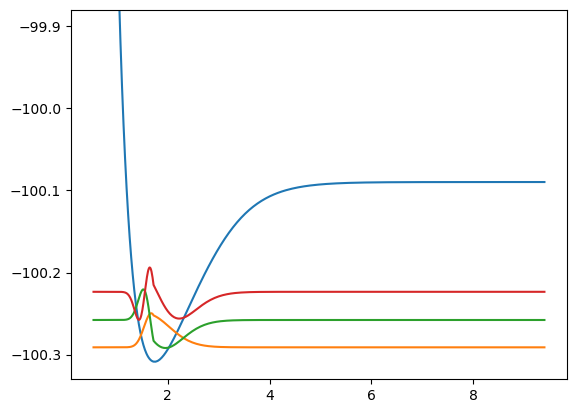

In [27]:
plt.plot(r, e)
plt.plot(r, 0.2*Cv[0] + Ev[0])
plt.plot(r, 0.2*Cv[1] + Ev[1])
plt.plot(r, 0.2*Cv[2] + Ev[2])
plt.ylim(-100.33,-99.88)

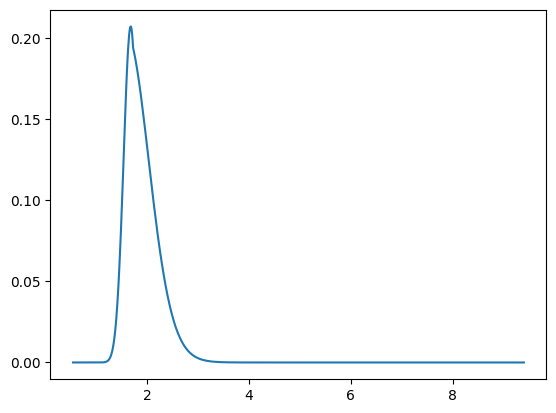

In [28]:
plt.plot(r, Cv[0])